### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import DistanceMetric

Get the Vertebral Column Data Set

In [2]:
dataframe = pd.read_csv("../data/vertebral_column_data/column_2C.dat",sep="\s+",names=['pelvic_incidence','pelvic_tilt',
                                                                        'lumbar_lordosis_angle','sacral_slope',
                                                                        'pelvic_radius','degree_spondylolisthesis','class'])

In [3]:
dataframe['class'].unique()

array(['AB', 'NO'], dtype=object)

In [4]:
dataframe

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [5]:
dataframe.replace("AB", "1",inplace=True)
dataframe.replace("NO","0",inplace=True)

In [6]:
dataframe

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Pairplots

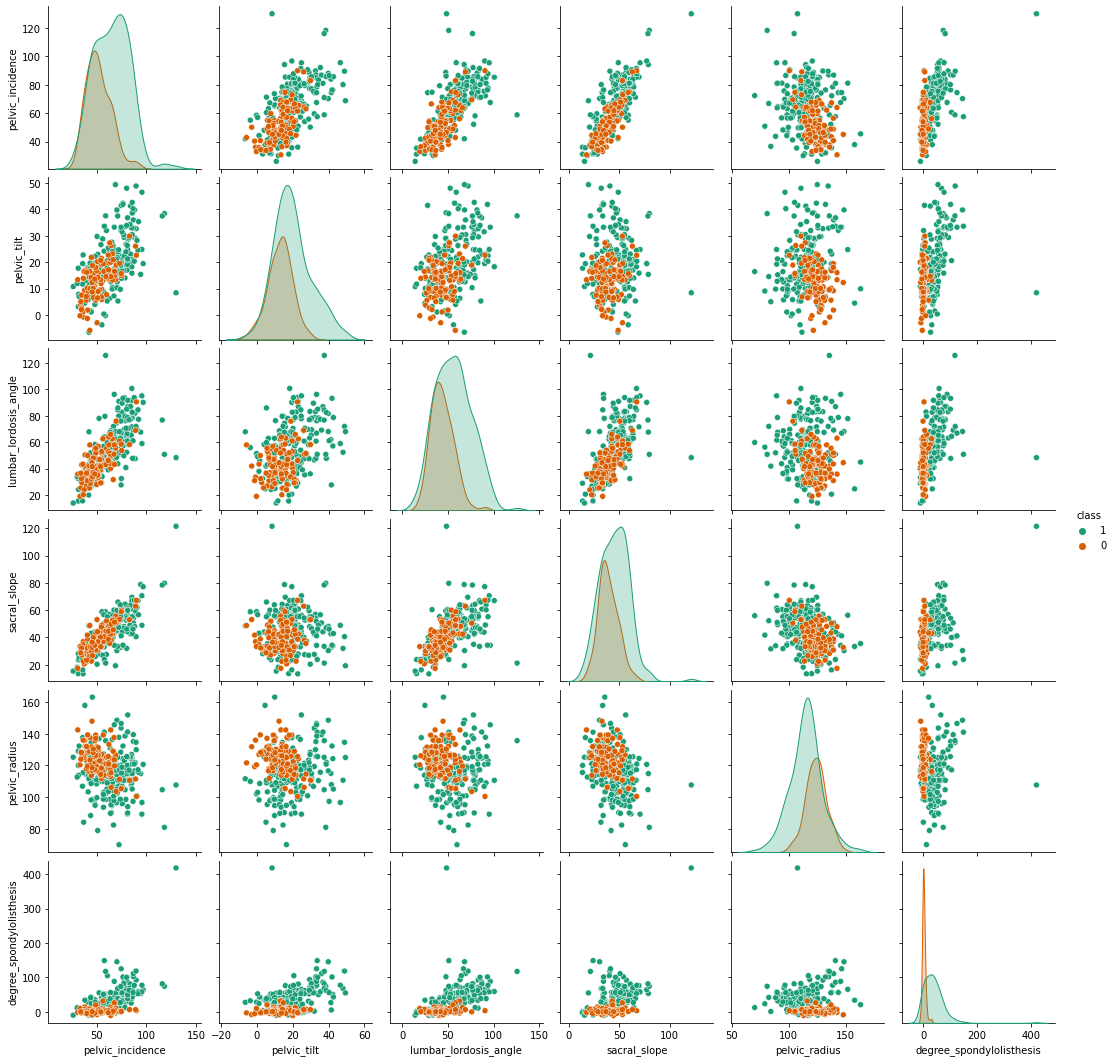

In [7]:
seaborn.pairplot(dataframe, kind='scatter', hue="class", palette="Dark2")

#### i. Scatterplots

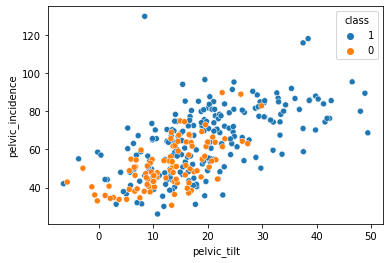

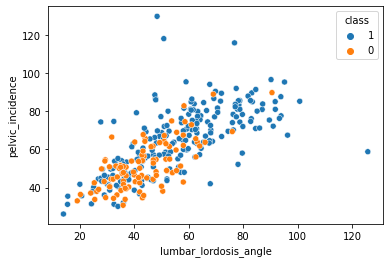

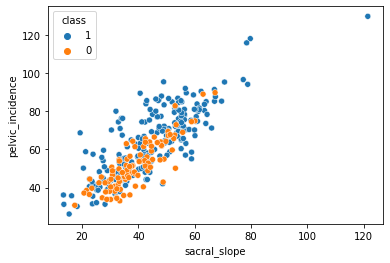

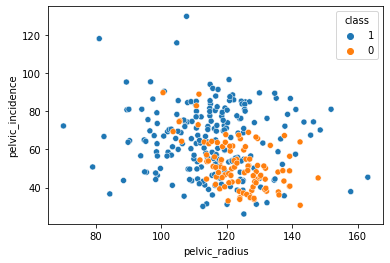

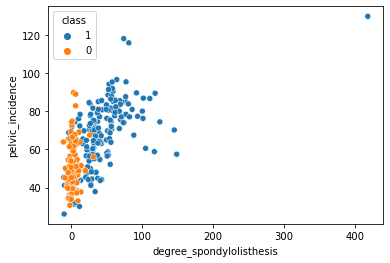

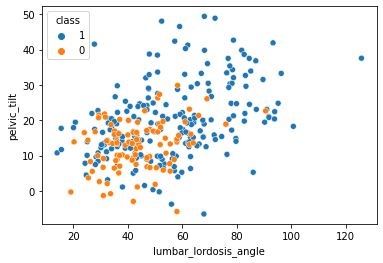

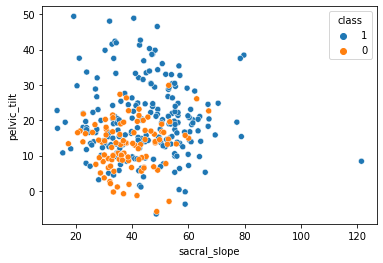

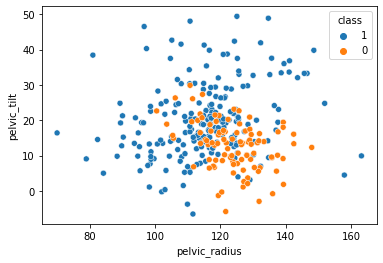

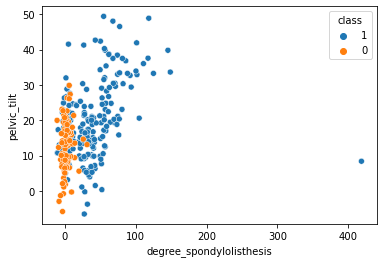

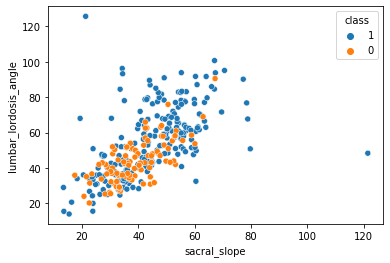

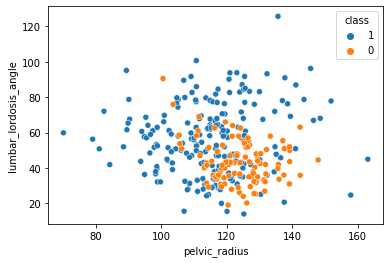

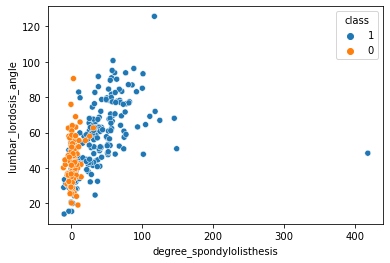

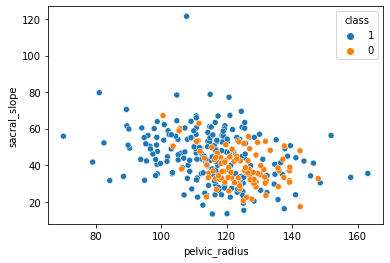

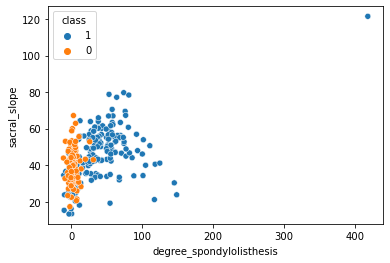

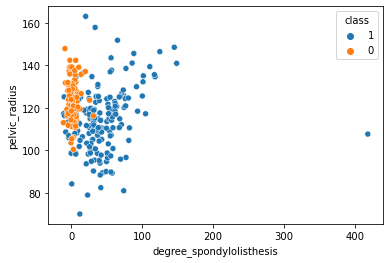

In [8]:
mapping = {"pelvic_incidence":['pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'],
          "pelvic_tilt":['lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis'],
          "lumbar_lordosis_angle":['sacral_slope','pelvic_radius','degree_spondylolisthesis'],
          "sacral_slope":['pelvic_radius','degree_spondylolisthesis'],
          "pelvic_radius":['degree_spondylolisthesis']}
for key,value in mapping.items():
    for column in value:
        seaborn.scatterplot(data=dataframe,y=dataframe[key],x=dataframe[column],hue="class")
        plt.show()

#### ii. Boxplots

<AxesSubplot:xlabel='class', ylabel='pelvic_incidence'>

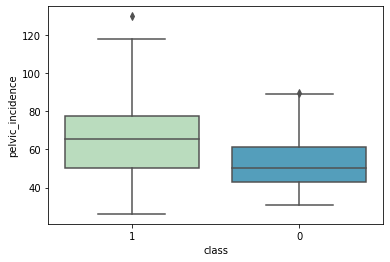

In [9]:
seaborn.boxplot(y=dataframe["pelvic_incidence"],x=dataframe["class"], palette="GnBu")

<AxesSubplot:xlabel='class', ylabel='pelvic_tilt'>

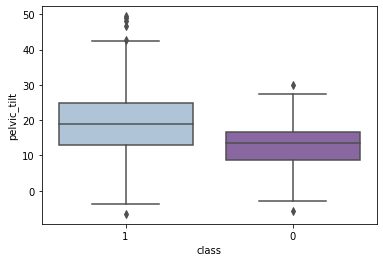

In [10]:
seaborn.boxplot(y=dataframe["pelvic_tilt"],x=dataframe["class"],palette="BuPu")

<AxesSubplot:xlabel='class', ylabel='lumbar_lordosis_angle'>

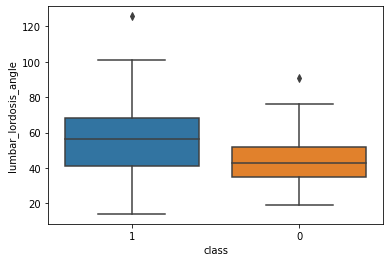

In [11]:
seaborn.boxplot(y=dataframe["lumbar_lordosis_angle"],x=dataframe["class"])

<AxesSubplot:xlabel='class', ylabel='sacral_slope'>

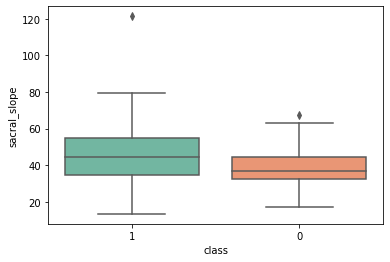

In [12]:
seaborn.boxplot(y=dataframe["sacral_slope"],x=dataframe["class"],palette="Set2")

<AxesSubplot:xlabel='class', ylabel='pelvic_radius'>

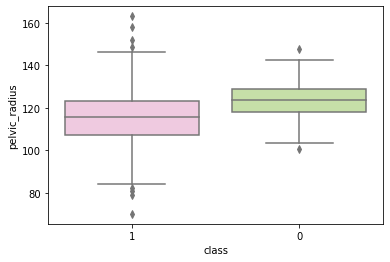

In [13]:
seaborn.boxplot(y=dataframe["pelvic_radius"],x=dataframe["class"],palette="PiYG")

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

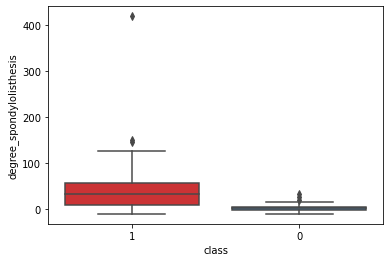

In [14]:
seaborn.boxplot(y=dataframe["degree_spondylolisthesis"],x=dataframe["class"],palette="Set1")

#### iii. Split Data Set

In [15]:
ab_df = dataframe[dataframe["class"]=='1']

In [16]:
ab_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29,1
206,95.48,46.55,59.00,48.93,96.68,77.28,1
207,74.09,18.82,76.03,55.27,128.41,73.39,1
208,87.68,20.37,93.82,67.31,120.94,76.73,1


In [17]:
no_df = dataframe[dataframe["class"]=='0']

In [18]:
no_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


In [19]:
x1 = no_df.drop(['class'],axis="columns")

In [20]:
x1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.51,16.96,35.11,21.54,127.63,7.99
211,54.92,18.97,51.60,35.95,125.85,2.00
212,44.36,8.95,46.90,35.42,129.22,4.99
213,48.32,17.45,48.00,30.87,128.98,-0.91
214,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25
306,53.94,20.72,29.22,33.22,114.37,-0.42
307,61.45,22.69,46.17,38.75,125.67,-2.71
308,45.25,8.69,41.58,36.56,118.55,0.21


In [21]:
y1 = no_df['class']

In [22]:
y1

210    0
211    0
212    0
213    0
214    0
      ..
305    0
306    0
307    0
308    0
309    0
Name: class, Length: 100, dtype: object

In [23]:
x1_train = x1[:70]
y1_train = y1[:70]

In [24]:
x1_test = x1[70:]
y1_test = y1[70:]

In [25]:
x2 = ab_df.drop(['class'],axis="columns")

In [26]:
x2 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92
...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29
206,95.48,46.55,59.00,48.93,96.68,77.28
207,74.09,18.82,76.03,55.27,128.41,73.39
208,87.68,20.37,93.82,67.31,120.94,76.73


In [27]:
y2 = ab_df['class']

In [28]:
y2

0      1
1      1
2      1
3      1
4      1
      ..
205    1
206    1
207    1
208    1
209    1
Name: class, Length: 210, dtype: object

In [29]:
x2_train = x2[:140]
x2_test = x2[140:]

In [30]:
y2_train = y2[:140]
y2_test = y2[140:]

In [31]:
x_train = pd.concat([x1_train,x2_train],axis=0)

In [32]:
x_train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.51,16.96,35.11,21.54,127.63,7.99
211,54.92,18.97,51.60,35.95,125.85,2.00
212,44.36,8.95,46.90,35.42,129.22,4.99
213,48.32,17.45,48.00,30.87,128.98,-0.91
214,45.70,10.66,42.58,35.04,130.18,-3.39
...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09
136,88.02,39.84,81.77,48.18,116.60,56.77
137,83.40,34.31,78.42,49.09,110.47,49.67
138,72.05,24.70,79.87,47.35,107.17,56.43


In [33]:
y_train = pd.concat([y1_train,y2_train],axis=0)

In [34]:
y_train

210    0
211    0
212    0
213    0
214    0
      ..
135    1
136    1
137    1
138    1
139    1
Name: class, Length: 210, dtype: object

In [35]:
x_test = pd.concat([x1_test,x2_test],axis=0)

In [36]:
x_test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
280,50.09,13.43,34.46,36.66,119.13,3.09
281,64.26,14.50,43.90,49.76,115.39,5.95
282,53.68,13.45,41.58,40.24,113.91,2.74
283,49.00,13.11,51.87,35.88,126.40,0.54
284,59.17,14.56,43.20,44.60,121.04,2.83
...,...,...,...,...,...,...
205,80.11,33.94,85.10,46.17,125.59,100.29
206,95.48,46.55,59.00,48.93,96.68,77.28
207,74.09,18.82,76.03,55.27,128.41,73.39
208,87.68,20.37,93.82,67.31,120.94,76.73


In [37]:
y_test = pd.concat([y1_test,y2_test],axis=0)

In [38]:
y_test

280    0
281    0
282    0
283    0
284    0
      ..
205    1
206    1
207    1
208    1
209    1
Name: class, Length: 100, dtype: object

### (c) Classification

#### i. Euclidean Metric

minimum training_error is 0.0
minimum testing_error is 0.06000000000000005
The value of K for min. test error of 0.06000000000000005 = 4
Confusion Matrix
----------------
[[25  5]
 [ 1 69]]
Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True Negative = 25
True Positive = 69
False Negative = 1
False Positive = 5
True Positive Rate/Sensitivity = 0.9857142857142858
True Negative Rate/specificity = 0.8333333333333334


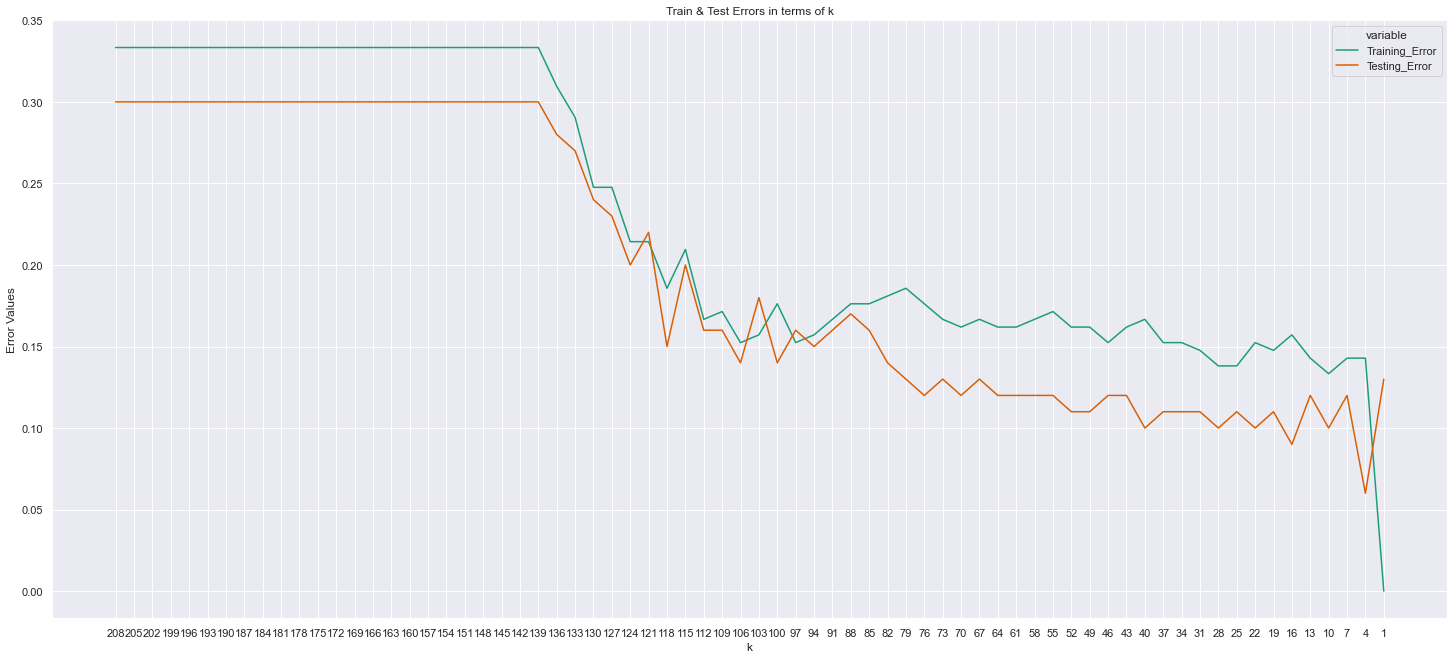

In [39]:
training_error = []
testing_error = []
for k in range(208,-1,-3):
    knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    knn.fit(x_train,y_train)
    knn_tr_score = knn.score(x_train,y_train)
    knn_te_score = knn.score(x_test,y_test)
    training_error.append(1-knn_tr_score)
    testing_error.append(1-knn_te_score)

print(f'minimum training_error is {min(training_error)}')

print(f'minimum testing_error is {min(testing_error)}')

# Euclidean Plot - Training and Test error against K values

kval = list(range(208,-1,-3))
error_data = pd.DataFrame({'K': kval,
                          'Training_Error': training_error,
                          'Testing_Error': testing_error})

seaborn.set(rc={'figure.figsize':(25,11)})
eplot = seaborn.lineplot(x="K",y="value",hue="variable",data=pd.melt(error_data,['K']),palette="Dark2",sort=False)
eplot.set(xlabel ="k", ylabel = "Error Values", title ='Train & Test Errors in terms of k')
plot = plt.xticks(kval)
eplot.invert_xaxis()

print(f"The value of K for min. test error of {min(testing_error)} = 4")

# Confusion Matrix

from sklearn.metrics import confusion_matrix

knn_k4 = KNeighborsClassifier(n_neighbors=4,metric="euclidean")
knn_k4.fit(x_train,y_train)
y_pred = knn_k4.predict(x_test)

conf_mat = confusion_matrix(y_test,y_pred)

print("Confusion Matrix")
print("----------------")
print(conf_mat)

# Classification Report

print("Classification Report")
print("---------------------")
print(classification_report(y_test,y_pred))

# True Negative Rate and True Positive Rate

print(f"True Negative = {conf_mat[0][0]}")
print(f"True Positive = {conf_mat[1][1]}")
print(f"False Negative = {conf_mat[1][0]}")
print(f"False Positive = {conf_mat[0][1]}")

print(f"True Positive Rate/Sensitivity = {conf_mat[1][1]/(conf_mat[1][1]+conf_mat[1][0])}")
print(f"True Negative Rate/specificity = {conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])}")

#### ii. Learning Curve

In [40]:
training_size = list(range(10,211,10))
best_test_error = []
best_k_for_n = []
for n in training_size:
    min_k = 0
    min_error = 1
    no_size = int(n/3)
    ab_size = n - no_size
    x1_train = x1[:no_size]
    y1_train = y1[:no_size]
    x2_train = x2[:ab_size]
    y2_train = y2[:ab_size]
    x_train = pd.concat([x1_train,x2_train],axis=0)
    y_train = pd.concat([y1_train,y2_train],axis=0)
    kval = list(range(1,n+1,5))
    for k in kval:
        knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
        knn.fit(x_train,y_train)
        knn_te_error = 1 - knn.score(x_test,y_test)
        if knn_te_error < min_error:
            min_error = knn_te_error
            min_k = k
    best_test_error.append(min_error)
    best_k_for_n.append([n,min_k,min_error])
learning_curve = pd.DataFrame(best_k_for_n,columns=['Training Size','k','min. test error'])

In [41]:
learning_curve

,Training Size,k,min. test error
0,10,1,0.25
1,20,6,0.20
2,30,1,0.22
3,40,11,0.25
4,50,26,0.30
5,60,21,0.29
6,70,26,0.29
7,80,31,0.29
8,90,41,0.29
9,100,6,0.25


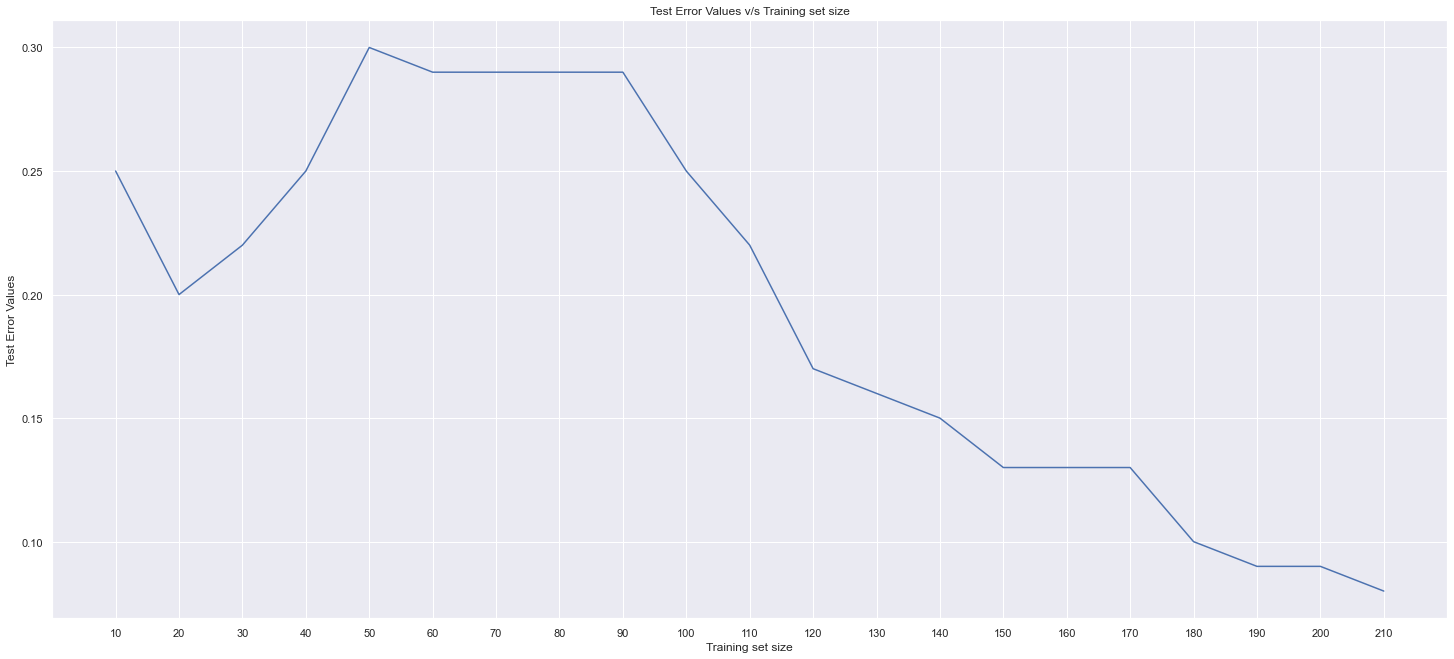

In [42]:
seaborn.set(rc={'figure.figsize':(25,11)})
lplot = seaborn.lineplot(x=training_size,y=best_test_error)
lplot.set(xlabel="Training set size",ylabel="Test Error Values",title="Test Error Values v/s Training set size")
l = plt.xticks(training_size)

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

The minimum training error for k in range of 1-196 with intervals of 5 is 0.0
The minimum test error for k in range of 1-196 with intervals of 5 is 0.10999999999999999
The K value for min. test error of 0.10999999999999999 is 6


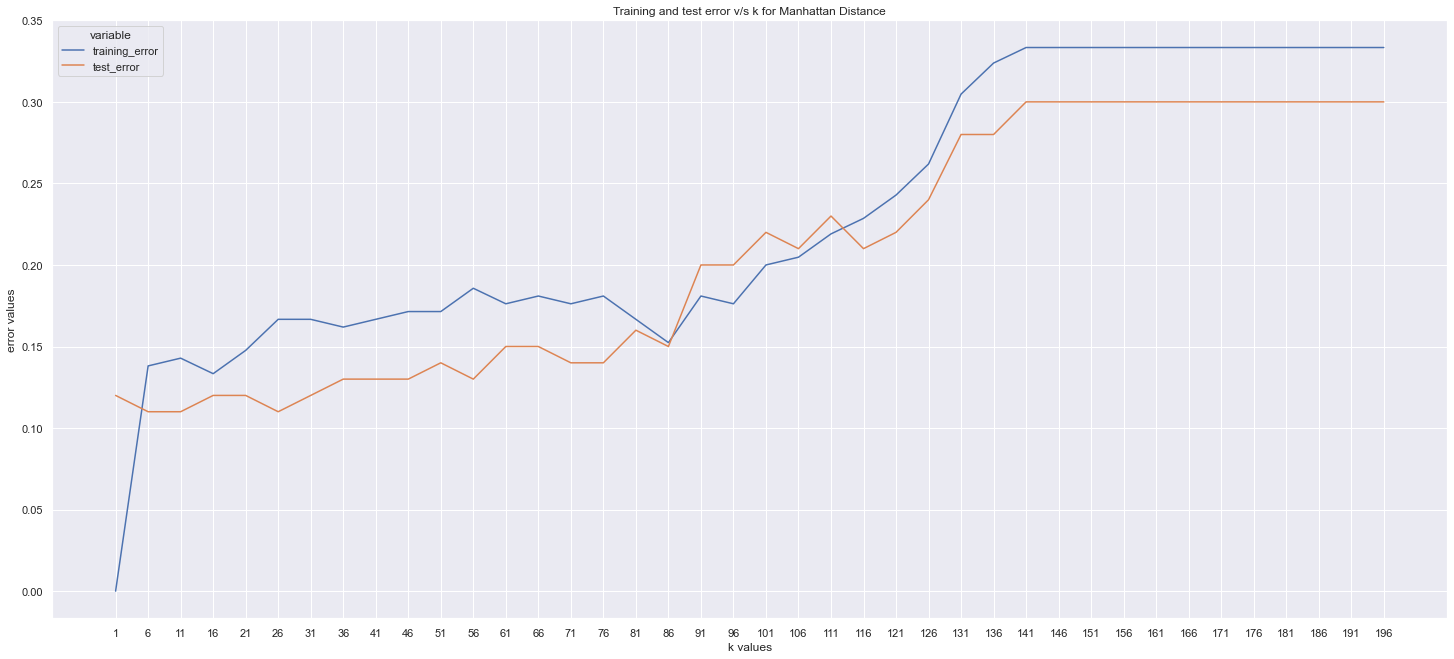

In [43]:
mink_train_error = []
mink_test_error = []
for k in range(1,197,5):
    mink_knn = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=1)
    mink_knn.fit(x_train,y_train)
    mink_tr_score = mink_knn.score(x_train,y_train)
    mink_te_score = mink_knn.score(x_test,y_test)
    mink_train_error.append(1-mink_tr_score)
    mink_test_error.append(1-mink_te_score)

print(f'The minimum training error for k in range of 1-196 with intervals of 5 is {min(mink_train_error)}')

print(f'The minimum test error for k in range of 1-196 with intervals of 5 is {min(mink_test_error)}')

# Manhattan Plot - Training and Test error against K values

kval = list(range(1,197,5))
err_data = pd.DataFrame({'k':kval,'training_error':mink_train_error,'test_error':mink_test_error})

seaborn.set(rc = {'figure.figsize':(25,11)})
eplot = seaborn.lineplot(x='k',y='value',hue='variable',data=pd.melt(err_data,['k']))
eplot.set(xlabel="k values",ylabel="error values",title="Training and test error v/s k for Manhattan Distance")
plot = plt.xticks(kval)

print(f'The K value for min. test error of {min(mink_test_error)} is 6')

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

The minimum training error is 0.1333333333333333
The minimum test error is 0.06000000000000005
The p value for minimum test error of 0.06000000000000005 given k=6 is 3.981


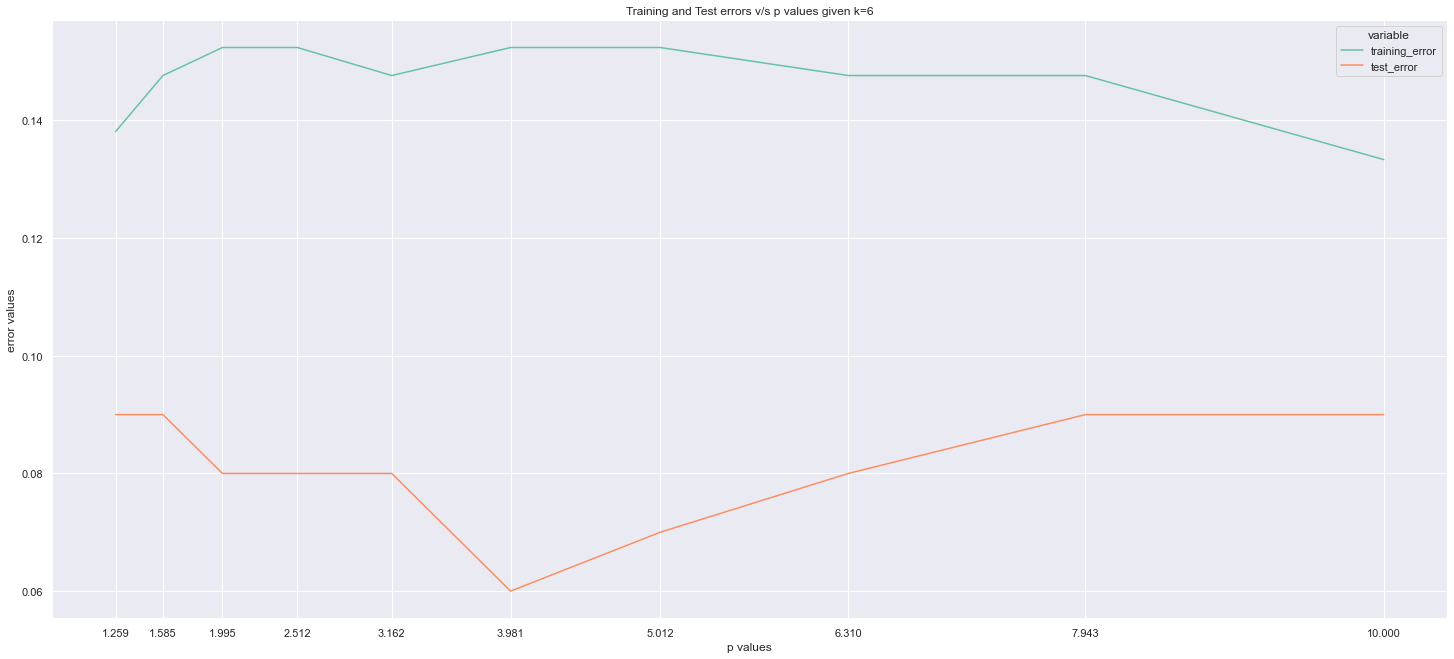

In [44]:
log_val = np.arange(0.1,1.1,0.1)

pval = list(map(lambda p: 10**p,log_val))

# k value is taken as 6 as that leads to min test error in manhattan distance
logp_training_error = []
logp_test_error = []
for p in pval:
    logp_knn = KNeighborsClassifier(n_neighbors=6,metric="minkowski",p=p)
    logp_knn.fit(x_train,y_train)
    logp_tr_error = logp_knn.score(x_train,y_train)
    logp_te_error = logp_knn.score(x_test,y_test)
    logp_training_error.append(1-logp_tr_error)
    logp_test_error.append(1-logp_te_error)

print(f'The minimum training error is {min(logp_training_error)}')

print(f'The minimum test error is {min(logp_test_error)}')

# Minkowski Plot - test and training error v/s p where p belongs to antilog(range of 0.1 to 1 with intervals of 0.1)

err_data = pd.DataFrame({'p':pval,'training_error':logp_training_error,'test_error':logp_test_error})

seaborn.set(rc={'figure.figsize':(25,11)})
eplot = seaborn.lineplot(x='p',y='value',hue='variable',data=pd.melt(err_data,['p']),palette="Set2")
eplot.set(xlabel="p values",ylabel="error values",title="Training and Test errors v/s p values given k=6")
plot = plt.xticks(pval)

print(f'The p value for minimum test error of {min(logp_test_error)} given k=6 is 3.981')

##### C. Chebyshev Distance With p -> infinity.

The Chebyshev minimum training error is 0.0
The Chebyshev minimum test error is 0.07999999999999996
From the above graph, the k value that leads to min. test error of 0.07999999999999996 is 16


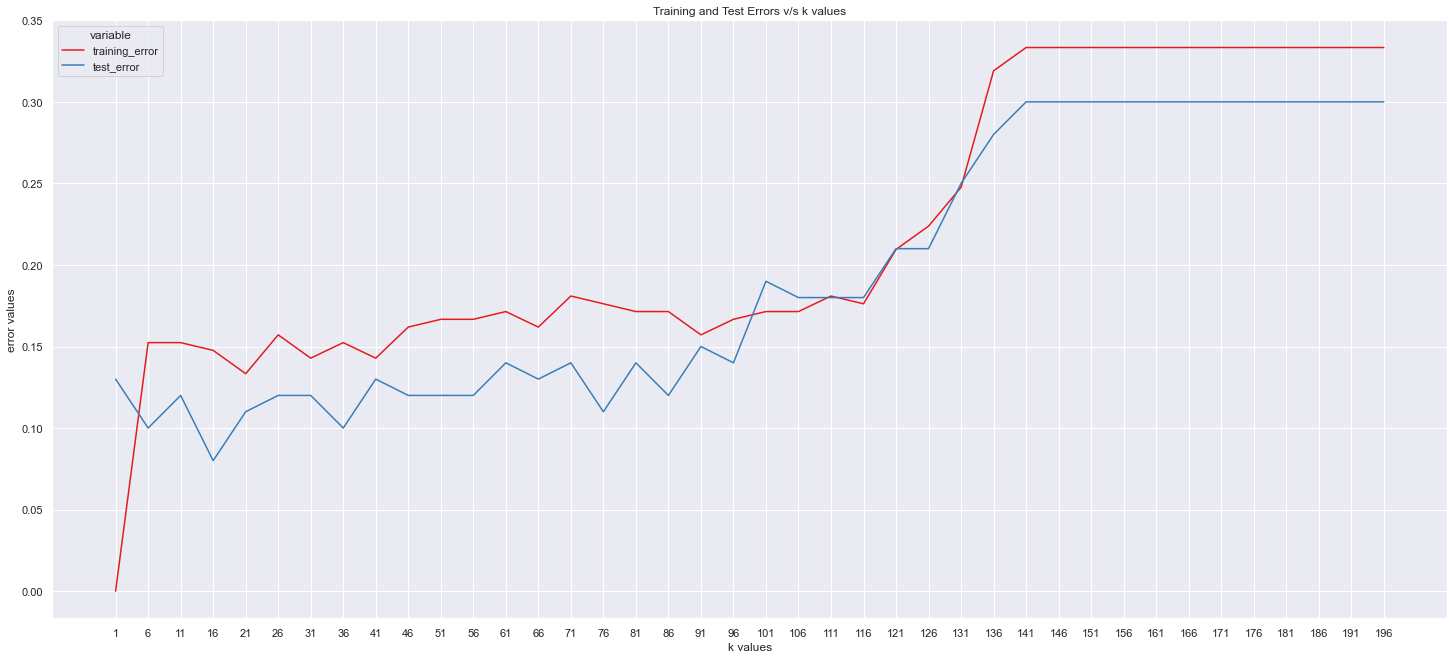

In [45]:
cheb_training_error = []
cheb_test_error = []
for k in kval:
    cheb_knn = KNeighborsClassifier(n_neighbors=k,metric="chebyshev",p=1)
    cheb_knn.fit(x_train,y_train)
    cheb_tr_score = cheb_knn.score(x_train,y_train)
    cheb_te_score = cheb_knn.score(x_test,y_test)
    cheb_training_error.append(1-cheb_tr_score)
    cheb_test_error.append(1-cheb_te_score)

print(f'The Chebyshev minimum training error is {min(cheb_training_error)}')

print(f'The Chebyshev minimum test error is {min(cheb_test_error)}')

# Chebyshev Plot - training and test error v/s k

err_data = pd.DataFrame({'k':kval,'training_error':cheb_training_error,'test_error':cheb_test_error})

seaborn.set(rc={'figure.figsize':(25,11)})
eplot = seaborn.lineplot(x='k',y='value',hue='variable',data=pd.melt(err_data,['k']),palette="Set1")
eplot.set(xlabel="k values",ylabel="error values",title="Training and Test Errors v/s k values")
plot = plt.xticks(kval) 

print(f'From the above graph, the k value that leads to min. test error of {min(cheb_test_error)} is 16')

#### ii. Mahalanobis Distance.

The Mahalanobis minimum training error is 0.0
The Mahalanobis minimum test error is 0.07999999999999996
The k value for Mahalanobis distance that gives the min. test error of 0.07999999999999996 is 6


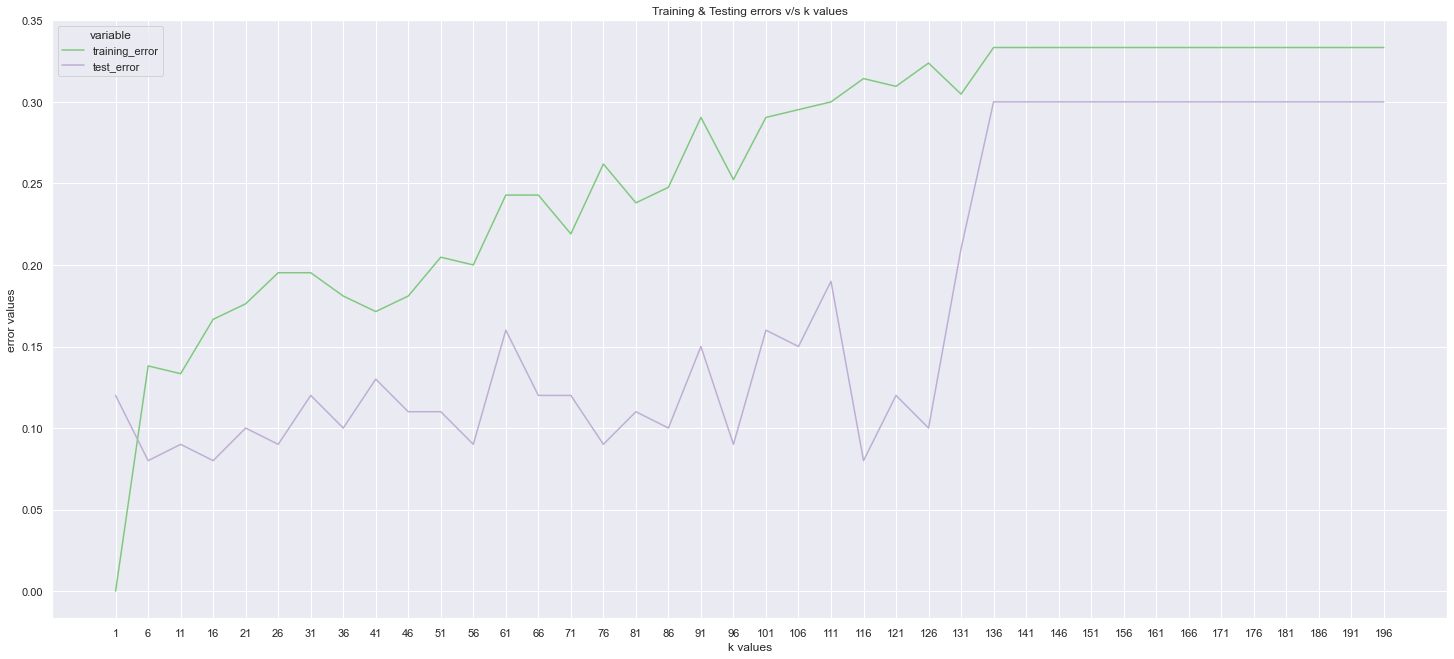

In [46]:
maha_training_error = []
maha_test_error = []
for k in kval:
    maha_knn = KNeighborsClassifier(n_neighbors=k,metric="mahalanobis",metric_params={'VI':np.cov(x_train,rowvar=False)})
    maha_knn.fit(x_train,y_train)
    maha_tr_score = maha_knn.score(x_train,y_train)
    maha_te_score = maha_knn.score(x_test,y_test)
    maha_training_error.append(1-maha_tr_score)
    maha_test_error.append(1-maha_te_score)

print(f'The Mahalanobis minimum training error is {min(maha_training_error)}')

print(f'The Mahalanobis minimum test error is {min(maha_test_error)}')

# Mahalanobis Distance - Training & Test error v/s K plot

err_data = pd.DataFrame({'k':kval,'training_error':maha_training_error,'test_error':maha_test_error})

seaborn.set(rc={'figure.figsize':(25,11)})
eplot = seaborn.lineplot(x='k',y='value',hue='variable',data=pd.melt(err_data,['k']),palette="Accent")
eplot.set(xlabel="k values",ylabel="error values",title="Training & Testing errors v/s k values")
plot = plt.xticks(kval)

print(f'The k value for Mahalanobis distance that gives the min. test error of {min(maha_test_error)} is 6')

## Summary - Majority Polling

In [54]:
mpdata = [['Best k value','4','6','6 (p=3.981)','16','6'],['Best min. test error','0.06','0.11','0.06','0.08','0.08']]
mpoll = pd.DataFrame(mpdata,columns=['KNN Metric','Euclidean','Manhattan','log p','Chebyshev','Mahalanobis'])

In [55]:
mpoll

,KNN Metric,Euclidean,Manhattan,log p,Chebyshev,Mahalanobis
0,Best k value,4,6,6 (p=3.981),16,6
1,Best min. test error,0.06,0.11,0.06,0.08,0.08


### (e) Weighted Decision

### i. Euclidean metric

The minimum training error for euclidean distance based on weighted decisions is 0.0
The minimum test error for euclidean distance based on weighted decisions is 0.09999999999999998
The k value for min. test error of 0.09999999999999998 based on weighted decisions is 6


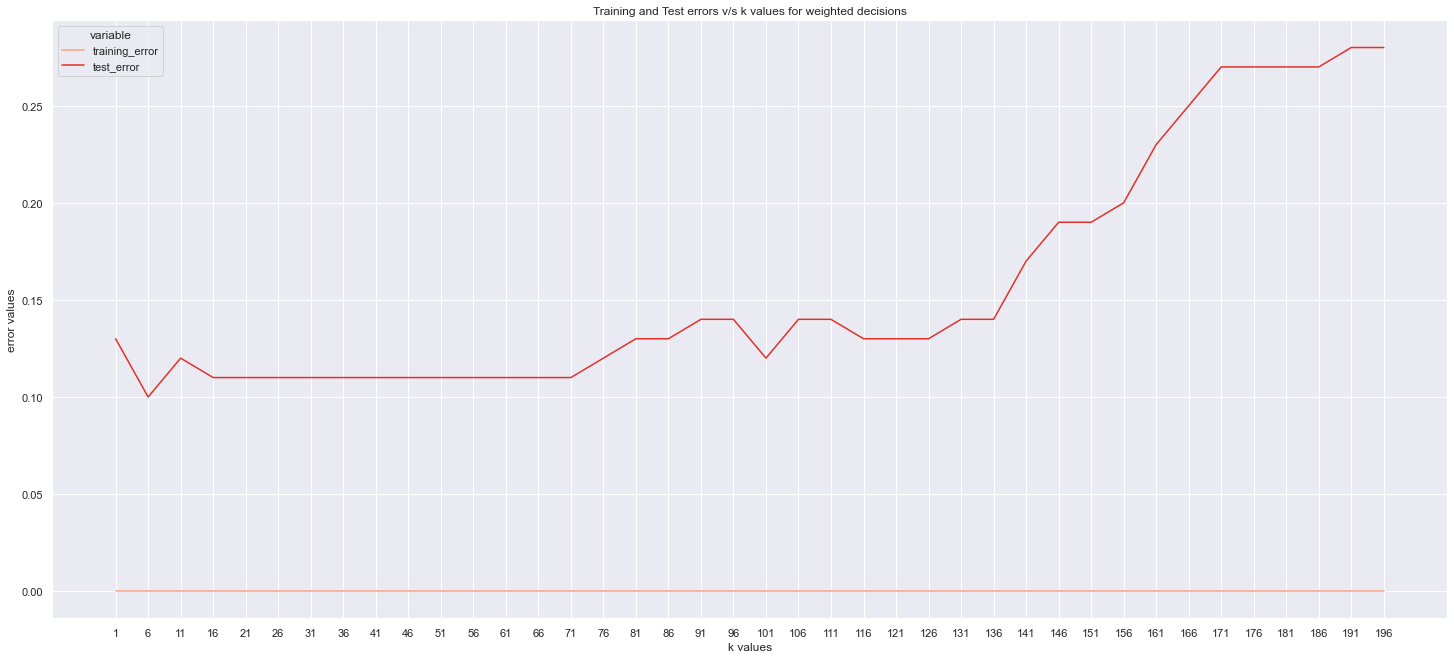

In [47]:
weighted_kval = list(range(1,197,5))

euclidean_train_error = []
euclidean_test_error = []
for k in weighted_kval:
    euclidean_knn = KNeighborsClassifier(n_neighbors=k,weights="distance",metric="euclidean")
    euclidean_knn.fit(x_train,y_train)
    euclidean_tr_score = euclidean_knn.score(x_train,y_train)
    euclidean_te_score = euclidean_knn.score(x_test,y_test)
    euclidean_train_error.append(1-euclidean_tr_score)
    euclidean_test_error.append(1-euclidean_te_score)

print(f'The minimum training error for euclidean distance based on weighted decisions is {min(euclidean_train_error)}')

print(f'The minimum test error for euclidean distance based on weighted decisions is {min(euclidean_test_error)}')

w_err_data = pd.DataFrame({'k':weighted_kval,'training_error':euclidean_train_error,'test_error':euclidean_test_error})

seaborn.set(rc={'figure.figsize':(25,11)})
wplot = seaborn.lineplot(x='k',y='value',hue='variable',data=pd.melt(w_err_data,['k']),palette='Reds')
wplot.set(xlabel="k values",ylabel="error values",title="Training and Test errors v/s k values for weighted decisions")
plot = plt.xticks(weighted_kval)

print(f'The k value for min. test error of {min(euclidean_test_error)} based on weighted decisions is 6')

## ii. Manhattan metrics

The min. training error for manhattan distance based on weighted decisions is 0.0
The min. test error for manhattan distance based on weighted decisions is 0.09999999999999998
The k value for min. test error of 0.09999999999999998 based on weighted decisions is 26


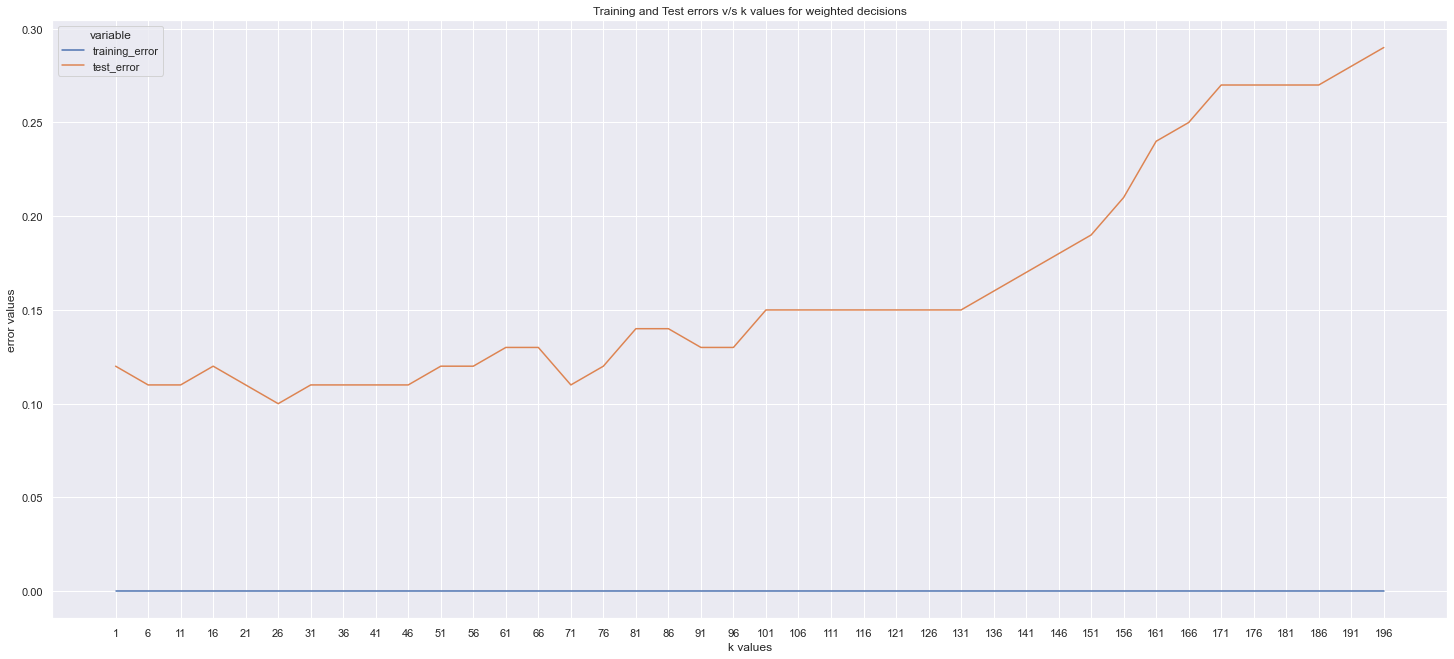

In [48]:
wmanhattan_train_error = []
wmanhattan_test_error = []
for k in weighted_kval:
    wmanh_knn = KNeighborsClassifier(n_neighbors=k,weights="distance",metric="minkowski",p=1)
    wmanh_knn.fit(x_train,y_train)
    wmanh_tr_score = wmanh_knn.score(x_train,y_train)
    wmanh_te_score = wmanh_knn.score(x_test,y_test)
    wmanhattan_train_error.append(1-wmanh_tr_score)
    wmanhattan_test_error.append(1-wmanh_te_score)

print(f'The min. training error for manhattan distance based on weighted decisions is {min(wmanhattan_train_error)}')

print(f'The min. test error for manhattan distance based on weighted decisions is {min(wmanhattan_test_error)}')

werr_plot = pd.DataFrame({'k':weighted_kval,'training_error':wmanhattan_train_error,'test_error':wmanhattan_test_error})
seaborn.set(rc={'figure.figsize':(25,11)})
wplot = seaborn.lineplot(x='k',y='value',hue='variable',data=pd.melt(werr_plot,['k']))
wplot.set(xlabel="k values",ylabel="error values",title="Training and Test errors v/s k values for weighted decisions")
plot = plt.xticks(weighted_kval)

print(f'The k value for min. test error of {min(wmanhattan_test_error)} based on weighted decisions is 26')

## iii. Chebyshev metrics

The min. training error for Chebyshev distance based on weighted decisions is 0.0
The min. test error for Chebyshev distance based on weighted decisions is 0.10999999999999999
The k value for min. test error of 0.10999999999999999 based on weighted decisions is 16


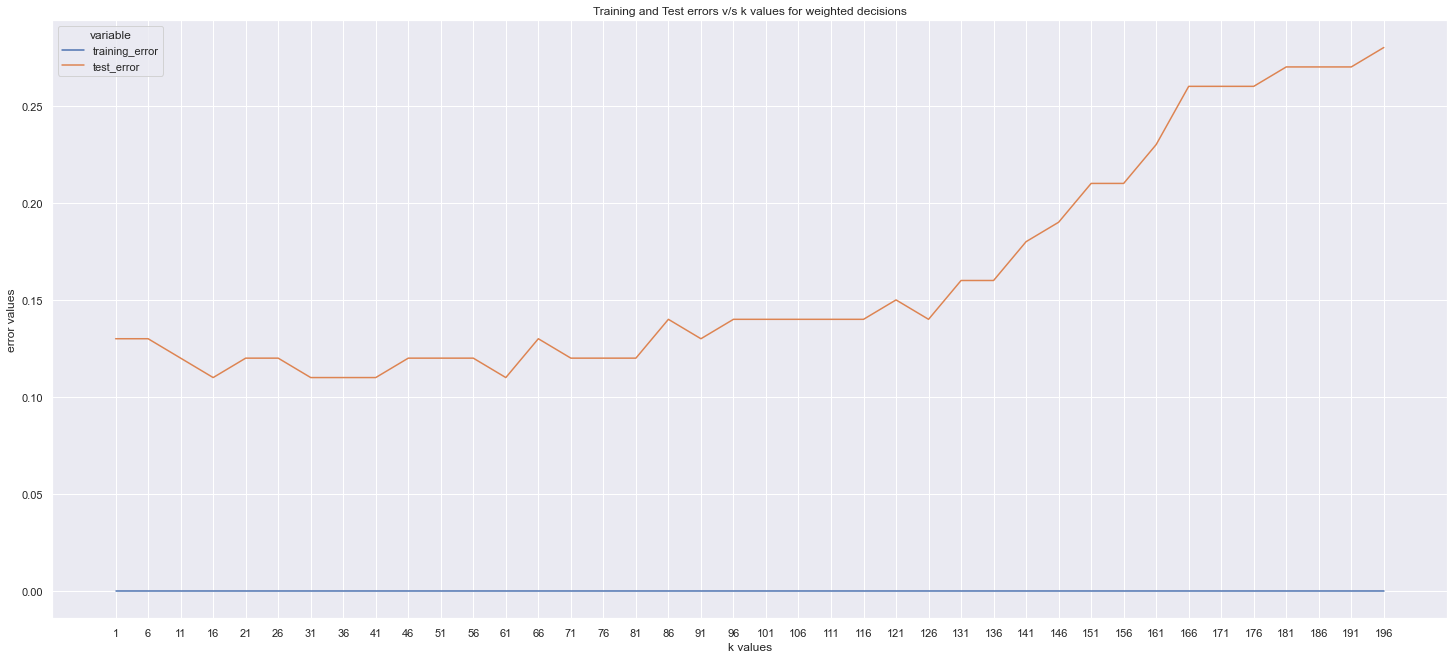

In [49]:
wcheb_train_error = []
wcheb_test_error = []
for k in weighted_kval:
    wcheb_knn = KNeighborsClassifier(n_neighbors=k,weights="distance",metric="chebyshev")
    wcheb_knn.fit(x_train,y_train)
    wcheb_tr_score = wcheb_knn.score(x_train,y_train)
    wcheb_te_score = wcheb_knn.score(x_test,y_test)
    wcheb_train_error.append(1-wcheb_tr_score)
    wcheb_test_error.append(1-wcheb_te_score)

print(f'The min. training error for Chebyshev distance based on weighted decisions is {min(wcheb_train_error)}')

print(f'The min. test error for Chebyshev distance based on weighted decisions is {min(wcheb_test_error)}')

werr_plot = pd.DataFrame({'k':weighted_kval,'training_error':wcheb_train_error,'test_error':wcheb_test_error})
seaborn.set(rc={'figure.figsize':(25,11)})
wplot = seaborn.lineplot(x='k',y='value',hue='variable',data=pd.melt(werr_plot,['k']))
wplot.set(xlabel="k values",ylabel="error values",title="Training and Test errors v/s k values for weighted decisions")
plot = plt.xticks(weighted_kval)

print(f'The k value for min. test error of {min(wcheb_test_error)} based on weighted decisions is 16')

## Summary Table - Weighted Decisions

In [56]:
wdata = [['Best k value','6','26','16'],['Best min. test error','0.1','0.1','0.11']]
wpoll = pd.DataFrame(wdata,columns=['KNN Metric','Weighted Euclidean','Weighted Manhattan','Weighted Chebyshev'])

In [57]:
wpoll

,KNN Metric,Weighted Euclidean,Weighted Manhattan,Weighted Chebyshev
0,Best k value,6,26,16
1,Best min. test error,0.1,0.1,0.11


### (f) Training Error Rate

In [60]:
idata = [['Lowest training error rate','0.0'],['Lowest test error rate','0.06']]
ipoll = pd.DataFrame(idata)

In [61]:
ipoll

,0,1
0,Lowest training error rate,0.0
1,Lowest test error rate,0.06


### Citations:
1. https://stackoverflow.com/questions/70075389/sklearn-nearestneighbors-with-mahalanobis-distance-returns-error-for-slice-of-ar
2. https://www.datacamp.com/tutorial/seaborn-python-tutorial
3. https://stats.stackexchange.com/questions/45580/dealing-with-ties-weights-and-voting-in-knn
4. https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
5. https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-k-nearest-neighbors-dab986e21b60
6. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/